Analisis casos manuales

In [1]:
import os
import pandas as pd
import datetime
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

username = os.getlogin()
hoy = datetime.datetime.now()
fecha_actual = hoy.strftime("%d.%m.%Y")
df1 = pd.DataFrame
df1 = pd.read_excel('C:\\Users\\' + username + '\\Documents\\Py\\CASOS\\tablacasos.xlsx',
                    sheet_name='Sheet1',header=0,
                    names=['caso','agencia','tdep','contacto','asunto','cierre','montocierre','depositado','banco','user','fapertura','fmod','alias','usermod'])
df1['tdep'] = df1['tdep'].astype(str)
df1.fillna('null', inplace=True)
df1['fapertura'] = pd.to_datetime(df1['fapertura'])
print("Tabla cargada.")

Tabla cargada.


C:\Users\dxs81864\AppData\Local\Temp\ipykernel_4188\3803590818.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.fillna('null', inplace=True)


Obtener la cantidad de casos cerrados

In [ ]:
count_df1 = df1[df1['usermod'].str.contains('ioliv')].groupby('usermod').size().reset_index(name='Count')
count_df2 = df1[df1['usermod'].str.contains('procom')].groupby('usermod').size().reset_index(name='Count')
count_df3 = df1[~df1['usermod'].str.contains('ioliv') | df1['usermod'].str.contains('procom')].groupby('usermod').size().reset_index(name='Count')
count_df = pd.concat([count_df1,count_df2])
sorted_df2 = count_df2
print (count_df)                                                            

  usermod  Count
0   ioliv   7554
0  procom   2252


Obtener cantidad de casos creados por usuario

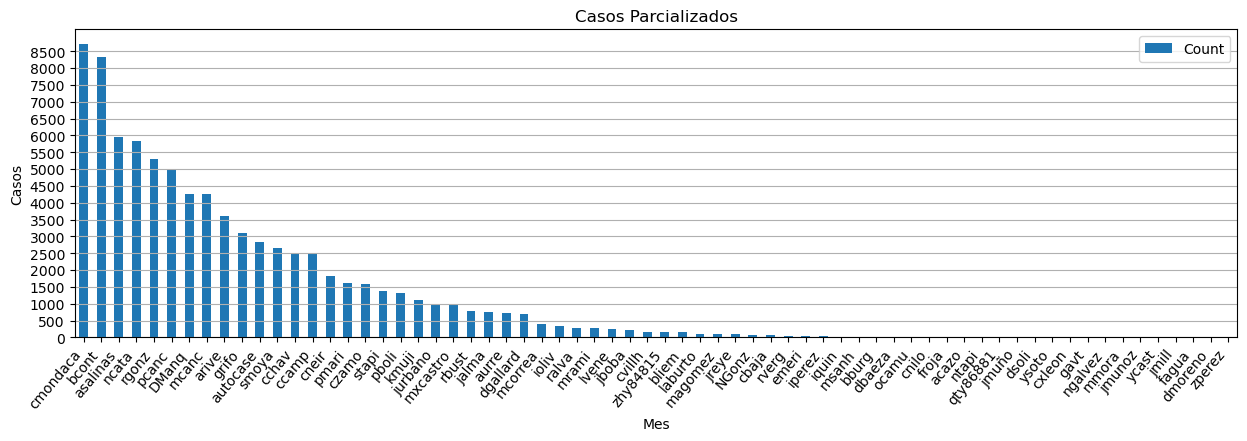

In [77]:
count_cpu= df1.groupby('user').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
count_cpu = count_cpu.set_index('user')
count_cpu.plot.bar(title='Casos Parcializados',xlabel='Mes',ylabel='Casos',figsize=(15,4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{int(x/1000000):,}'))
plt.xticks(rotation=50, ha='right')
plt.grid(axis='y')
plt.yticks(np.arange(0,9000,step=500))
plt.show()

In [ ]:
count_df = df1[df1['tdep'].str.contains('')].groupby('tdep').size().reset_index(name='Count')
sorted_df = count_df.sort_values(by='Count', ascending=False)
print (sorted_df)
sorted_df.to_csv('C:\\Users\\dxs81864\\Documents\\Py\\CASOS\\GENERADOS\\Pdc ' + fecha_actual + '.csv',
               sep=';',
               header=False,
               index=False)
                                  

Obtener la ocurrencia de tipo de caso

Reemplazar tipo de caso y periodicidad

In [ ]:
periodicity = df1[df1['tdep'].str.contains('Parcializado')]
periodicity = periodicity.loc[periodicity['fapertura'] > '2023-01-01']
periodicity = periodicity.groupby(df1['fapertura'].dt.to_period('m'))['tdep'].count()
count = periodicity.resample('m').sum()
#print(count)
print(count.mean())

datetime64[ns]
634.1739130434783


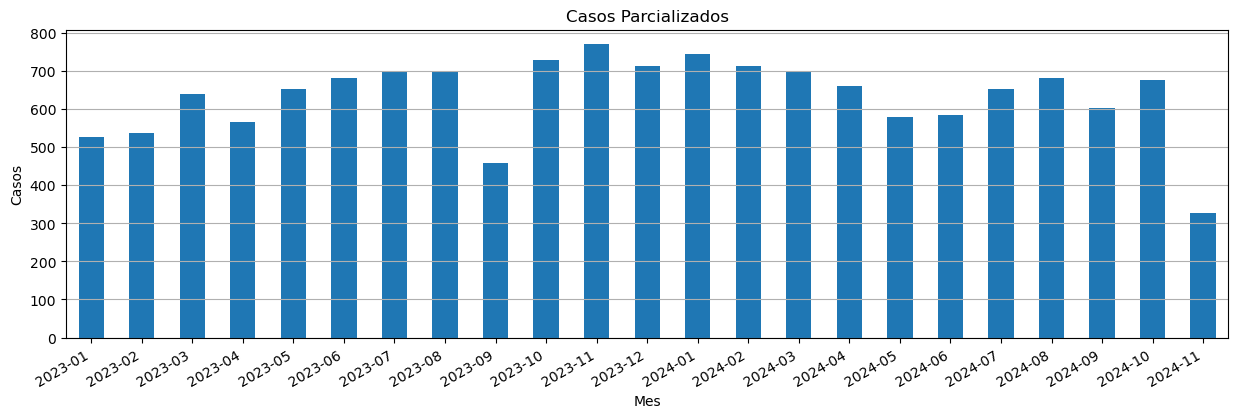

In [64]:
count.plot.bar(title='Casos Parcializados',xlabel='Mes',ylabel='Casos',figsize=(15,4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{int(x/1000000):,}'))
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
#plt.yticks(np.arange(-40000000,170000000,step=10000000))
plt.show()

Obtener ocurrencia por agencia de casos parcializados por agencia agrupado según mes

In [16]:
df_parc = df1[df1['tdep'].str.contains('Parcializado')]
df_conteoparc = df_parc.groupby([pd.Grouper(key='fapertura', freq='M'),'agencia']).size().reset_index(name='periodicity')
print(df_conteoparc)

       fapertura   agencia  periodicity
0     2020-07-31       102            1
1     2020-07-31       113            2
2     2020-07-31       119            1
3     2020-07-31    119000            1
4     2020-07-31  15062004            1
...          ...       ...          ...
13294 2024-11-30   5037018            1
13295 2024-11-30   5145005            1
13296 2024-11-30        53            1
13297 2024-11-30   7003005            1
13298 2024-11-30   8119007           10

[13299 rows x 3 columns]


Tabla de casos pre-conciliados

In [59]:
dfc = df1.copy()
dfc = dfc.loc[dfc['fapertura'] > '2023-01-01']
dfpc = dfc[dfc['tdep'].str.contains('Problema cartola')]
dfc = dfc[~dfc['tdep'].str.contains('Problema cartola')|dfc['tdep'].str.contains('Plan de contingencia')] 
#dfc = dfc[~dfpc['caso'].isin(dfc['caso'])]
periodicity = dfc[dfc['usermod'].str.contains('procom') | dfc['usermod'].str.contains('Sysadmin')].groupby(dfc['fapertura'].dt.to_period('D'))['caso'].count()
periodicitypc = dfc[dfc['tdep'].str.contains('Problema cartola')].groupby(dfc['fapertura'].dt.to_period('D'))['caso'].count()
dfc_plot = periodicity.copy().resample('m').sum()
dfpc_plot = periodicitypc.copy().resample('m').sum()
#dfc = dfc[~dfpc.isin(dfc)]

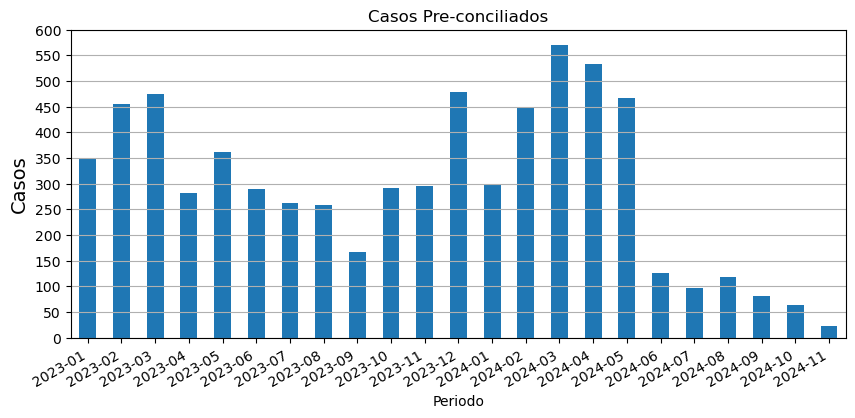

In [66]:
dfc_plot.plot(kind='bar',x='count', figsize=(10,4))
plt.title('Casos Pre-conciliados')
plt.xlabel('Periodo')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Casos', fontsize = 14)
plt.yticks(np.arange(0,650,step=50))
plt.grid(axis='y')
arrcasos = dfc_plot.to_numpy()
#for i, v in enumerate(y):
#    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
#myFmt = mdates.DateFormatter('%b/%Y')
#plt.gca().xaxis.set_major_formatter(myFmt)
#plt.xticks(np.arange('2023-12', '2024-12', dtype='datetime64[M]'),rotation=10, ha='right')
plt.show()

In [ ]:
tipos_tdep = df1['tdep'].unique()
tipos_user = df1['user'].unique()
tipos_user = df1['user'].unique()
tipos_agencia = df1['agencia'].unique()

In [ ]:
print(tipos_tdep)

In [68]:
print(tipos_user)

['smoya' 'bcont' 'cvillh' 'asalinas' 'pboli' 'aurre' 'rbust' 'rgonz'
 'autocase' 'mxcastro' 'bburg' 'pcanc' 'ralva' 'czamo' 'mcorrea' 'dbaeza'
 'zperez' 'cxleon' 'jboba' 'cneir' 'laburto' 'DManq' 'NGonz' 'iperez'
 'rverg' 'magomez' 'dgallard' 'jmunoz' 'cmondaca' 'ngalvez' 'qty86881'
 'grifo' 'emeri' 'gavt' 'mrami' 'ysoto' 'zhy84815' 'pmari' 'jalma' 'msanh'
 'cnilo' 'stapi' 'dsoli' 'jurbano' 'ntapi' 'mmora' 'ncata' 'ycast' 'mcanc'
 'cchav' 'ccamp' 'bliem' 'iquin' 'acazo' 'ocamu' 'arive' 'dmoreno' 'lvene'
 'cbaja' 'jreye' 'kmuji' 'fagua' 'ioliv' 'froja' 'jmill' 'jmuño']


In [58]:
print(tipos_user)

['smoya' 'bcont' 'cvillh' 'asalinas' 'pboli' 'aurre' 'rbust' 'rgonz'
 'autocase' 'mxcastro' 'bburg' 'pcanc' 'ralva' 'czamo' 'mcorrea' 'dbaeza'
 'zperez' 'cxleon' 'jboba' 'cneir' 'laburto' 'DManq' 'NGonz' 'iperez'
 'rverg' 'magomez' 'dgallard' 'jmunoz' 'cmondaca' 'ngalvez' 'qty86881'
 'grifo' 'emeri' 'gavt' 'mrami' 'ysoto' 'zhy84815' 'pmari' 'jalma' 'msanh'
 'cnilo' 'stapi' 'dsoli' 'jurbano' 'ntapi' 'mmora' 'ncata' 'ycast' 'mcanc'
 'cchav' 'ccamp' 'bliem' 'iquin' 'acazo' 'ocamu' 'arive' 'dmoreno' 'lvene'
 'cbaja' 'jreye' 'kmuji' 'fagua' 'ioliv' 'froja' 'jmill' 'jmuño']
